## Clustering
+ Finding subgroups/clusters within data that are similar.
+ To define two or more observations to be similar or different, often a domain-specific consideration must be made based on knowledge of the data being studied.
+ Clustering and PCA seek to simplify the data via a small number of summaries.
+ But, PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance;
+ While clustering looks to find homogeneous subgroups among the observations.
+ Applications:
    + **market segmentation** - identify subgroups of people who might be more receptive to a particular form of advertising, or more likely to purchase a particular product. 
+ Can cluster observations based on the features, or cluster features based on the observations to discover subgroups among the features. 
+ The latter can be performed by simply transposing data matrix.

### K-Means
+ Clustering where you define the number of clusters, K, ahead of time. 
+ Let $C_1, \ldots, C_K$ denote sets containing indices of the observations, where:
    + $C_1 \cup C_2 \cup \ldots \cup C_K = \left\{ 1, \ldots, n \right\}$.
    + $C_k \cap C_{k^\prime} = \emptyset$ for all $k \neq k^\prime$
    + $i \in C_k$ means that $i^\textrm{th}$ observation is in the $k^\textrm{th}$ cluster.
+ Good clustering is one for which the within-cluster variation, $W(C_k)$, is as small as possible,
$$\min_{C_1, \ldots, C_K}\left\{ \sum_{k=1}^K{W(C_k)} \right\}$$
Which means we want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible.
+ There are many possible ways to define this concept, but by far the most common choice involves squared Euclidean distance.
$$W(C_k) = \frac{1}{|C_k|}\sum_{i,i^\prime \in C_k}\sum_{j=1}^p{(x_{ij} - x_{i^\prime j})^2}$$
where $|C_k|$ is the number of observations in the $k^\textrm{th}$ cluster.
+ One way to solve this is by this approach:
    + Randomly assign each point to a cluster 
    + Iterate until cluster assignments stop changing:
        + For each cluster, compute the cluster centroid (vector of the p feature means for the observations in that cluster). 
        + All points are then reassigned based on whose centroid is closest (using euclidean distance). 
        + A new centroid is found by averaging the points in each cluster. 
        + Process stops after centroids stop moving or some max number of iterations.
    + It is important to run the algorithm multiple times from different random initial configurations. Selects the best solution
+ Can do initial assignment multiple times and choose clustering assignment with least total variance.



In [ ]:
from IPython.display import Image
Image('images/pw101.png', width =700)

In [ ]:
Image('images/pw102.png', width =700)

In [ ]:
Image('images/pw103.png', width =700)

### Lab 1
+ The `sklearn` function `Kmeans()` performs K-means clustering in Python. 
+ We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

In [ ]:
## perform K-means clustering with K = 2:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 123).fit(X)

In [ ]:
## The cluster assignments of the 50 observations are contained in kmeans.labels_:
print(kmeans.labels_)

In [ ]:
X

+ The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `Kmeans()`. 
+ We can plot the data, with each observation colored according to its cluster assignment:

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

+ Here the observations can be easily plotted because they are two-dimensional.
+ If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.

+ In this example, we knew that there really were two clusters because we generated the data. 
+ However, for real data, in general we do not know the true number of clusters. 
+ We could instead have performed K-means clustering on this example with `K  =  3`. 
+ If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

In [ ]:
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

+ To run the `Kmeans()` function in python with multiple initial cluster assignments, we use the `n_init` argument (default: 10). 
+ If a value of `n_init` greater than one is used, then K-means clustering will be performed using multiple random assignments, and the `Kmeans()` function will report only the best results. 
+ Here we compare using `n_init = 1`:

In [ ]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run.inertia_

In [ ]:
## `n_init = 20`:
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

+ Note that `.inertia_` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.

+ It is generally recommended to always run K-means clustering with a large value of `n_init`, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.

+ When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the `random_state` parameter. 
+ This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.


#### Advantages of K-Means
+ Relatively scalable and efficient in processing large data sets
+ The computational complexity of the algorithm is $O(nkt)$
    + $n$ : total number of objects
    + $k$ : number of clusters
    + $t$ : number of iterations
    + Normally, $k<<n$ and $t<<n$

#### Disadvantages of K-Means
+ Can be applied only when the mean of a cluster is defined
+ Users need to specify $k$
+ K-means is not suitable for discovering clusters with nonconvex shapes or clusters of very different size
+ It is sensitive to noise and outlier data points (can influence the mean value)

#### Notes:
+ There were variants of k-means which differ in:
    + Selection of the initial k means
    + Dissimilarity calculations
    + Strategies to calculate cluster means



### K-modes
+ To handle categorical data
+ Using modes instead of means
+ There were various dissimilarity measures to deal with categorical objects
+ Using a frequency based method to update modes of clusters
+ The entire algorithm for K-modes is built upon using the highest frequency to form the clusters.
+ Mixture of categorical and numerical data.


#### Algorithm
1. Randomly assign $K$ number of modes. (select initial $k$ number of random data points as modes).
2. Calculate the dissimilarity score between each of the remaining data points from the $K$ number of chosen modes.
3. Associate the data points to the mode whose score is minimum. (you will have $K$ number of clusters)
4. Use ‘Moving mode frequency based method’ to update the modes (for each of the $k$ clusters we need to update the modes).
5. Repeat from step 2 until there is no reassignment of clusters or when cost function is minimized.

#### Dissimilarity score
Let $X$ and $Y$ are two categorical objects having $n$ attributes:
$X = [X_1, X_2, \cdots, X_n]$, $Y = [Y_1, Y_2, \cdots, Y_n]$
The dissimilarity score is given as 

$$\textrm{Diss}(X,Y) = \sum_{j=1}^n{\delta(X_j,Y_j)}$$

where

$$\delta(X_j,Y_j) = \begin{cases} 0 \textrm{ if } X_j=Y_j \\
1 \textrm{ if } X_j\neq Y_j \end{cases}$$

#### Moving mode frequency based method
Let $A = \left[ \begin{matrix} 1 \\ 1 \\ 0 \end{matrix} \right], B = \left[ \begin{matrix} 0 \\ 1 \\ 1 \end{matrix} \right], C = \left[ \begin{matrix} 0 \\ 0 \\ 1 \end{matrix} \right]$ be three categorical objects having three attributes in binary format.

Then the new updated mode will be $\textrm{Mode} = \left[ \begin{matrix} 0 \\ 1 \\ 1 \end{matrix} \right]$

#### Cost function
Let there be $C_i (i=1,\ldots,K)$ number of clusters formed after using k-modes algorithm, then the cost function is given by

$$J=\sum_{i=1}^k{\sum_{X_j \in C_i}{\textrm{Diss}(X_j,Q_i)}}$$

where $X_j$ is categorical object of $i^\textrm{th}$ cluster and $Q_i$ is the mode of the $i^\textrm{th}$ cluster.

### Lab 2

In [ ]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = np.random.choice(20, (100, 10))

data

In [ ]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)



In [ ]:
# Print the cluster centroids
print(km.cluster_centroids_)

In [ ]:
km.labels_

### Lab 3

download soybean dataset: https://github.com/nicodv/kmodes/tree/master/examples

In [ ]:


import numpy as np
from kmodes.kmodes import KModes

# reproduce results on small soybean data set
x = np.genfromtxt('data/soybean.csv', dtype=int, delimiter=',')[:, :-1]
y = np.genfromtxt('data/soybean.csv', dtype=str, delimiter=',', usecols=(35, ))

kmodes_huang = KModes(n_clusters=4, init='Huang', verbose=1)
kmodes_huang.fit(x)


In [ ]:
# Print cluster centroids of the trained model.
print('k-modes (Huang) centroids:')
print(kmodes_huang.cluster_centroids_)
# Print training statistics
print('Final training cost: {}'.format(kmodes_huang.cost_))
print('Training iterations: {}'.format(kmodes_huang.n_iter_))

In [ ]:
kmodes_cao = KModes(n_clusters=4, init='Cao', verbose=1)
kmodes_cao.fit(x)

In [ ]:
# Print cluster centroids of the trained model.
print('k-modes (Cao) centroids:')
print(kmodes_cao.cluster_centroids_)
# Print training statistics
print('Final training cost: {}'.format(kmodes_cao.cost_))
print('Training iterations: {}'.format(kmodes_cao.n_iter_))


In [ ]:
print('Results tables:')
for result in (kmodes_huang, kmodes_cao):
    classtable = np.zeros((4, 4), dtype=int)
    for ii, _ in enumerate(y):
        classtable[int(y[ii][-1]) - 1, result.labels_[ii]] += 1

    print("\n")
    print("    | Cl. 1 | Cl. 2 | Cl. 3 | Cl. 4 |")
    print("----|-------|-------|-------|-------|")
    for ii in range(4):
        prargs = tuple([ii + 1] + list(classtable[ii, :]))
        print(" D{0} |    {1:>2} |    {2:>2} |    {3:>2} |    {4:>2} |".format(*prargs))



## K-Medoids
+ Minimize sensitivity of k-means to outliers
+ Pick actual objects to represent clusters instead of mean values
+ Each remaining object is clustered with the representative object (called medoids) to which is the most similar
+ The algorithm minimizes the sum of the dissimilarities between each object and its corresponding reference point, where the absolute-error criterion is defined as
$$ E = \sum_{j=1}^k{\sum_{p \in C_j}\left|p-o_j\right|}$$
where $p$ is the point in space representing a given object in cluster $C_j$ and $o_j$ is the representative object of $C_j$.
+ The algorithm iterates until, eventually, each representative object is actually the medoid, or most centrally located object, of its cluster. This is the basis of the k-medoids method for grouping $n$ objects into $k$ clusters.

### Partitioning Around Medoids (PAM)
1. After an initial random selection of $k$ representative objects, the algorithm repeatedly tries to make a better choice of cluster representatives.
2. Randomly select a non-representative object
3. All of the possible pairs of objects are analyzed, where one object in each pair is considered a representative object and the other is not.
4. The quality of the resulting clustering is calculated for each such combination.
5. An object, $o_j$, is replaced with the object causing the greatest reduction in error.
6. The set of best objects for each cluster in one iteration forms the representative objects for the next iteration.
7. The final set of representative objects are the respective medoids of the clusters.

In [ ]:
Image('images/pw1012.png', width =900)

!pip install pyclustering

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis.
sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
# Set random initial medoids.
initial_medoids = [1, 500]
# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(sample, initial_medoids)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Show allocated clusters.
print(clusters)
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

In [ ]:
sample

In [ ]:
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample

import numpy, warnings 
numpy.warnings = warnings

# load list of points for cluster analysis
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)

# initialize
initial_medoids = kmeans_plusplus_initializer(sample, 4, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize(return_index=True)

# create instance of K-Medoids algorithm
kmedoids_instance = kmedoids(sample, initial_medoids)

# run cluster analysis and obtain results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# visualize clustering results
visualizer = cluster_visualizer(1)
visualizer.append_clusters(clusters, sample, 0)
visualizer.append_cluster([sample[index] for index in initial_medoids], marker='*', markersize=5)
visualizer.append_cluster(medoids, data=sample, marker='*', markersize=15)
visualizer.show()

In [ ]:
sample

## K-Prototypes
Mixture of continuous and categorical data

In [ ]:
#create dataset
import numpy as np 
import pandas as pd

operating_systems = ["Android","iOS"]
isp_names = ["Cox","HughesNet","Xfinity","AT&T"]

data = []
for i in range(100):
    row = []
    row.append(np.random.choice(operating_systems)) #OS
    row.append(np.random.choice(isp_names)) #ISP
    row.append(np.random.poisson(lam=25)) #Age 
    row.append(np.random.uniform(low=0.5, high=1000)) #Time Spent
    data.append(row)

customers = pd.DataFrame(data, columns = ['OS', 'ISP','Age','Time Spent'])

In [ ]:
customers.head()

In [ ]:
#make sure to rescale those continuous variables

from sklearn import preprocessing
customers_norm = customers.copy()
scaler = preprocessing.MinMaxScaler()
customers_norm[['Age','Time Spent']] = scaler.fit_transform(customers_norm[['Age','Time Spent']])
customers_norm.head()

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao')

# specify which columns in the data are categorical (columns 0 and 1)
clusters = kproto.fit_predict(customers_norm, categorical=[0, 1])
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((customers,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [ ]:
labeledCustomers

In [ ]:
labeledCustomers.info()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


ax.scatter(labeledCustomers.OS.astype('category').cat.codes, labeledCustomers.ISP.astype('category').cat.codes, 
           labeledCustomers.Age, c = labeledCustomers.labels) 

plt.show()

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(labeledCustomers.ISP.astype('category').cat.codes, labeledCustomers['Time Spent'],
           labeledCustomers.Age, c = labeledCustomers.labels) 

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(labeledCustomers.OS.astype('category').cat.codes, labeledCustomers['Time Spent'],
           labeledCustomers.Age, c = labeledCustomers.labels) 

# Common distance measures used for clustering
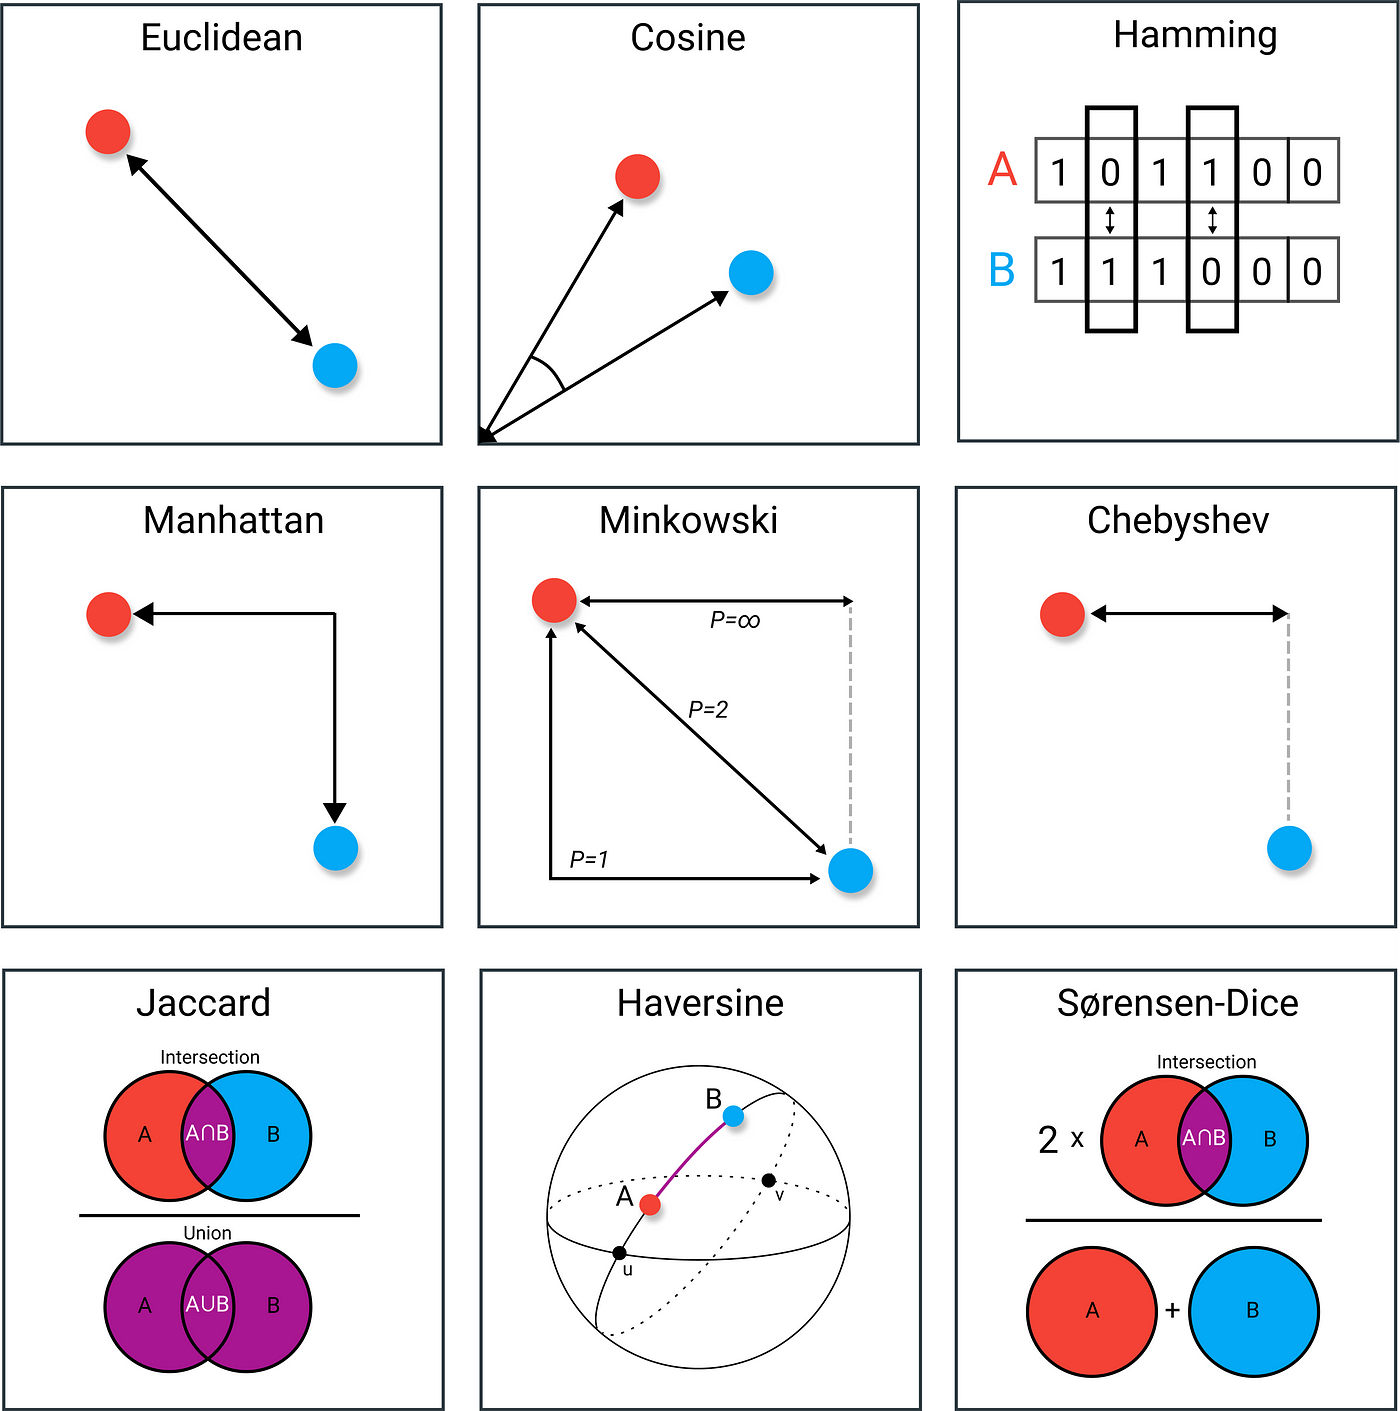